<a href="https://colab.research.google.com/github/swatigawale/Assignment-9-Association-Rules-/blob/main/Assignment_9_(Association_Rules).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment-09-Association Rules Data Mining (Books)**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Import Dataset
book=pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Data preprocessing not required as it is already in transaction format

**Apriori Algorithm**

1. Association rules with 10% Support and 70% confidence

In [ ]:
# With 10% Support
frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [ ]:
# with 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [ ]:
## A leverage value of 0 indicates independence. Range will be [-1 1]
## A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [ ]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [ ]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


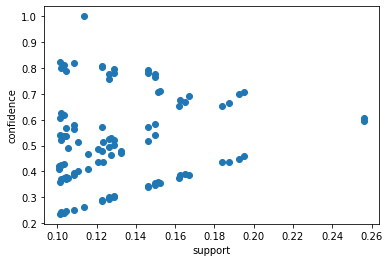

In [ ]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

2. Association rules with 20% Support and 60% confidence

In [ ]:
# With 20% Support
frequent_itemsets2=apriori(book,min_support=0.20,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [ ]:
# With 60% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


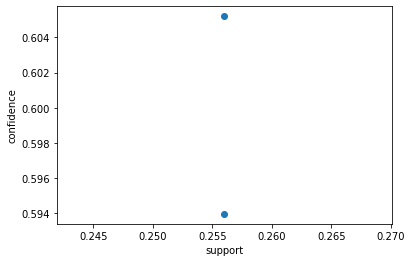

In [ ]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

3. Association rules with 5% Support and 80% confidence

In [ ]:
# With 5% Support
frequent_itemsets3=apriori(book,min_support=0.05,use_colnames=True)
frequent_itemsets3


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, GeogBks, YouthBks, CookBks)"
96,0.0560,"(ArtBks, GeogBks, YouthBks, CookBks)"
97,0.0650,"(DoItYBks, ArtBks, GeogBks, CookBks)"
98,0.0510,"(GeogBks, YouthBks, CookBks, ChildBks, DoItYBks)"


In [ ]:
# With 80% confidence
rules3=association_rules(frequent_itemsets3,metric='lift',min_threshold=0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(GeogBks),"(DoItYBks, ArtBks, ChildBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
658,(CookBks),"(DoItYBks, GeogBks, ChildBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(ChildBks),"(DoItYBks, ArtBks, GeogBks, CookBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
660,(DoItYBks),"(ArtBks, GeogBks, ChildBks, CookBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085


In [ ]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(GeogBks),"(DoItYBks, ArtBks, ChildBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
658,(CookBks),"(DoItYBks, GeogBks, ChildBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(ChildBks),"(DoItYBks, ArtBks, GeogBks, CookBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
660,(DoItYBks),"(ArtBks, GeogBks, ChildBks, CookBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085


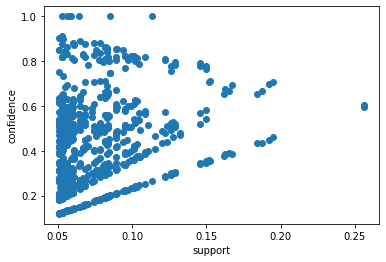

In [ ]:
# visualization of obtained rule
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

**Assignment-09-Association Rules Data Mining (my_movies)**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Import Dataset
movie=pd.read_csv('my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [ ]:
movie.shape

(10, 15)

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [ ]:
movie2=movie.iloc[:,5:]
movie2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


**Apriori Algorithm**

**1. Association rules with 10% Support and 70% confidence**

In [ ]:
# with 10% support
frequent_itemsets=apriori(movie2,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [ ]:
# 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Green Mile, Sixth Sense, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Harry Potter1),"(Green Mile, LOTR2, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(Green Mile, LOTR2, Harry Potter1, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(LOTR1),"(Green Mile, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [ ]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Green Mile, Sixth Sense, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Harry Potter1),"(Green Mile, LOTR2, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(Green Mile, LOTR2, Harry Potter1, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(LOTR1),"(Green Mile, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


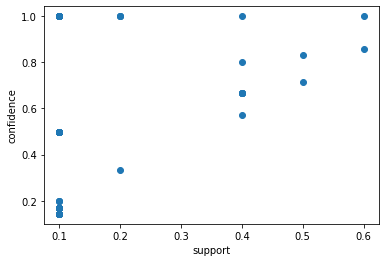

In [ ]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**1. Association rules with 5% Support and 90% confidence**

In [ ]:
# with 5% support
frequent_itemsets2=apriori(movie2,min_support=0.05,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [ ]:
# 90% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
233,(LOTR2),"(Green Mile, Sixth Sense, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Harry Potter1),"(Green Mile, LOTR2, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(Sixth Sense),"(Green Mile, LOTR2, Harry Potter1, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
236,(LOTR1),"(Green Mile, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [ ]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
233,(LOTR2),"(Green Mile, Sixth Sense, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Harry Potter1),"(Green Mile, LOTR2, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(Sixth Sense),"(Green Mile, LOTR2, Harry Potter1, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
236,(LOTR1),"(Green Mile, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


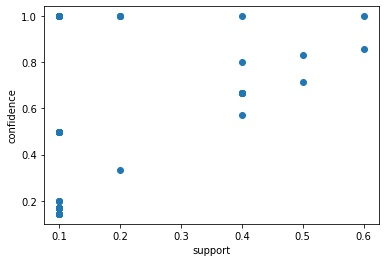

In [ ]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()